
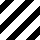
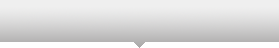
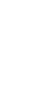
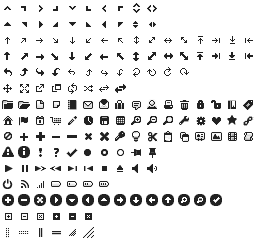
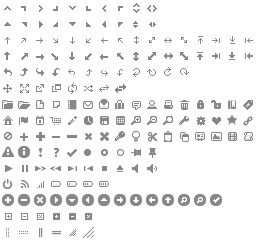
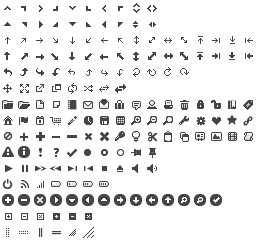
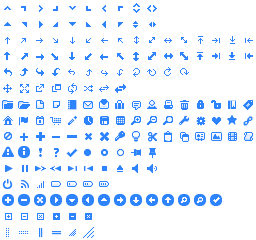
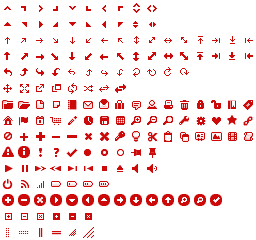
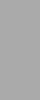
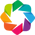
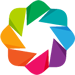
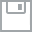
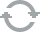
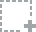
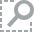
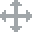
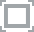
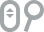

{'height': 768,
 'start_slideshow_at': 'selected',
 'theme': 'solarized',
 'transition': 'fade',
 'width': 1024}

In [1]:
from IPython.display import display, HTML
import bubble_plot
import pandas as pd

from bokeh.plotting import show, output_notebook
output_notebook()

from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              #'width': 1024,
              #'height': 768,
              'theme': 'solarized',
              'transition': 'fade',
              'start_slideshow_at': 'selected',
})

## Getting setup

https://github.com/bokeh/bokeh-notebooks/

#### Install Bokeh 0.9.0 & ipython-notebook

`conda install bokeh `

`conda install ipython-notebook `

`conda install pandas`

#### Python 2 or 3 is fine

<table style="border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="assets/images/bokeh-transparent.png" 
               style="width:70px; float: right; margin-bottom: 40px;"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial</h1>
       </td>
   </tr>
   <tr style="border:none">
       <td style="border:none">
           <h3 style="margin-top:20px">Sarah Bird</h3>
           <ul style="margin-top:0px">
           <li>twitter: birdsarah</li>
           <li>Bokeh contributor</li>
           </ul>
           <h3>Bryan Van de Ven</h3>
           <ul style="margin-top:0px; margin-bottom: 20px;">
           <li>twitter: bryvdv</li>
           <li>Lead developer on Bokeh</li>
           </ul>
       </td>
   </tr>
</table>

* Overview of Bokeh, features, ways to use it
* Exercises 1 (20 minutes)
 * 01 - plotting.ipynb
 * 02 - charts.ipynb
* Navigating the Bokeh docs & examples
* Exercises 2 (20 minutes)
 * 03 - models.ipynb
 * 04 - styling.ipynb
* Interactions & sharing plots
* Exercises 3 (20 minutes)
 * 05 - sharing.ipynb
 * 06 - interactions.ipynb
* Open space till end of session

----

# What is Bokeh
* Data visualization library
* Build interactive visualizations for the web
* Data-driven
* Uses canvas (as opposed to svg)
* Written in python (or....)
* Alternative to d3, matplotlib, ....

In [2]:
display(HTML(bubble_plot.get_bubble_html()))

# Why bokeh?

* python vs javascript
* mid-data (and big-data)
* interesting things with the "server" (streaming data, server-side computation)
* work in ipython notebook - share interactively on the web

my new default

#Python <-> web?

![bokeh simple](assets/images/bokeh_basic.svg)

![bokeh pieces](assets/images/bokeh_with_tentacles_2.svg)

In [3]:
display(HTML(bubble_plot.get_bubble_html()))

# Charts interface

#### Chart functions are awesome!

In [4]:
from bokeh.charts import (
Area, Bar, BoxPlot, Donut, Dot, HeatMap, Histogram,
Horizon, Line, Scatter, Step, TimeSeries, 
)

### Get some data

In [5]:
xyvalues = bubble_plot.get_scatter_data()
xyvalues['1964'][0:5]

[(7.6710000000000003, 33.639000000000003),
 (5.7110000000000003, 65.474999999999994),
 (7.6529999999999996, 47.953000000000003),
 (7.4249999999999998, 34.603999999999999),
 (4.25, 63.774999999999999)]

In [6]:
from bokeh.charts import Scatter
show(Scatter(xyvalues))

### Basic customizations

In [7]:
scatter = Scatter(
    xyvalues, 
    tools="wheel_zoom, reset", 
    ylabel="Children per woman (total fertility)", 
    xlabel="Life expectancy at birth (years)",
    title="Life expectancy vs Fertility in 1964",
    width=800,
    height=600,
    xgrid=None,
    ygrid=None,
)
scatter.outline_line_color = 'white'
scatter.logo = None
scatter.toolbar_location = 'right'

In [8]:
show(scatter)

### Charts interface undergoing major overhaul - check out 0.10 (~end of Summer)

# Models

The low-level API that lets you build pieces up individually

In [9]:
from bokeh.models import Range1d, Plot

def get_plot():
    xdr = Range1d(1, 9)
    ydr = Range1d(20, 100)
    plot = Plot(
        x_range=xdr,
        y_range=ydr,
        title="",
        plot_width=800,
        plot_height=400,
        outline_line_color=None,
        toolbar_location=None,
    )
    return plot
show(get_plot())

In [10]:
AXIS_FORMATS = dict(
    minor_tick_in=None,
    minor_tick_out=None,
    major_tick_in=None,
    major_label_text_font_size="10pt",
    major_label_text_font_style="normal",
    axis_label_text_font_size="10pt",

    axis_line_color='#AAAAAA',
    major_tick_line_color='#AAAAAA',
    major_label_text_color='#666666',

    major_tick_line_cap="round",
    axis_line_cap="round",
    axis_line_width=1,
    major_tick_line_width=1,
)

In [11]:
from bokeh.models import LinearAxis, SingleIntervalTicker

def add_axes(plot):
    xaxis = LinearAxis(SingleIntervalTicker(interval=1), axis_label="Children per woman (total fertility)", **AXIS_FORMATS)
    yaxis = LinearAxis(SingleIntervalTicker(interval=20), axis_label="Life expectancy at birth (years)", **AXIS_FORMATS)
    plot.add_layout(xaxis, 'below')
    plot.add_layout(yaxis, 'left')
    return plot
show(add_axes(get_plot()))

In [12]:
from bokeh.models import ColumnDataSource, Text
years, regions, fertility_df, life_expectancy_df, population_df_size, regions_df = bubble_plot._get_data()

text_source = ColumnDataSource({'year': ['1964']})

def add_text(plot):
    plot = add_axes(plot)
    # Add the year in background (add before circle)
    text = Text(x=2, y=35, text='year', text_font_size='150pt', text_color='#EEEEEE')
    plot.add_glyph(text_source, text)
    return plot

show(add_text(get_plot()))

In [13]:
from bokeh.models import Circle, HoverTool
from bokeh.palettes import Spectral6

renderer_source = ColumnDataSource(bubble_plot.get_1964_data())

def add_circles(plot):
    plot = add_text(plot)
    # Add the circle
    circle_glyph = Circle(
        x='fertility', y='life', size='population',
        fill_color='region_color', fill_alpha=0.8,
        line_color='#7c7e71', line_width=0.5, line_alpha=0.5)
    circle_renderer = plot.add_glyph(renderer_source, circle_glyph)

    # Add the hover (only against the circle and not other plot elements)
    tooltips = "@index"
    plot.add_tools(HoverTool(tooltips=tooltips, renderers=[circle_renderer]))
    return plot

show(add_circles(get_plot()))

In [14]:
def add_legend(plot):
    plot = add_circles(plot)
    # Add a custom legend
    text_x = 7
    text_y = 95
    for i, region in enumerate(regions):
        plot.add_glyph(Text(x=text_x, y=text_y, text=[region], text_font_size='10pt', text_color='#666666'))
        plot.add_glyph(Circle(x=text_x - 0.1, y=text_y + 2, fill_color=Spectral6[i], size=10, line_color=None, fill_alpha=0.8))
        text_y = text_y - 5
    return plot
    
show(add_legend(get_plot()))

# Interaction

In [19]:
from bokeh.models import Callback, Slider
from bokeh.plotting import vplot, hplot
sources = {}

region_color = regions_df['region_color']
region_color.name = 'region_color'

def make_interactive(plot):
    plot = add_legend(plot)
    
    for year in years:
        fertility = fertility_df[year]
        fertility.name = 'fertility'
        life = life_expectancy_df[year]
        life.name = 'life'
        population = population_df_size[year]
        population.name = 'population'
        new_df = pd.concat([fertility, life, population, region_color], axis=1)
        sources['_' + str(year)] = ColumnDataSource(new_df)

    dictionary_of_sources = dict(zip([x for x in years], ['_%s' % x for x in years]))
    js_source_array = str(dictionary_of_sources).replace("'", "")

    # Add the slider
    code = """
        var year = slider.get('value'),
            sources = %s,
            new_source_data = sources[year].get('data');
        renderer_source.set('data', new_source_data);
        renderer_source.trigger('change');
        text_source.set('data', {'year': [String(year)]});
        text_source.trigger('change');
    """ % js_source_array

    callback = Callback(args=sources, code=code)
    slider = Slider(start=years[0], end=years[-1], value=1, step=1, title="Year", callback=callback)
    callback.args["slider"] = slider
    callback.args["renderer_source"] = renderer_source
    callback.args["text_source"] = text_source

    
    return vplot(plot, hplot(slider))

show(make_interactive(get_plot()))

In [ ]:
from bokeh.plotting import vplot, hplot
layout = vplot(plot, hplot(slider))

In [ ]:
for year in years:
    fertility = fertility_df[year]
    fertility.name = 'fertility'
    life = life_expectancy_df[year]
    life.name = 'life'
    population = population_df_size[year]
    population.name = 'population'
    new_df = pd.concat([fertility, life, population, region_color], axis=1)
    sources['_' + str(year)] = ColumnDataSource(new_df)

In [16]:
print(sources['_1964'])
print(sources['_1965'])
print(sources['_1966'])

ColumnDataSource, ViewModel:ColumnDataSource, ref _id: db4bbaf4-974d-4538-993c-8b8a1917fc88
ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 186306e5-c65c-4e0a-a7e9-8589997406b0
ColumnDataSource, ViewModel:ColumnDataSource, ref _id: bc5d2dc8-96e7-4f62-9aea-91925ce58f72


In [ ]:
# Add the slider
code = """
    var year = slider.get('value'),
        sources = %s,
        new_source_data = sources[year].get('data');
    renderer_source.set('data', new_source_data);
    renderer_source.trigger('change');
    text_source.set('data', {'year': [String(year)]});
    text_source.trigger('change');
""" % js_source_array

callback = Callback(args=sources, code=code)
slider = Slider(start=years[0], end=years[-1], value=1, step=1, title="Year", callback=callback)
callback.args["slider"] = slider
callback.args["renderer_source"] = renderer_source
callback.args["text_source"] = text_source

# Embedding

* ipython - output_notebook() & show -> works on nbviewer (not github view)
* file - output_file() & show / save


* embed functions - file_html, components, ...
* understand Resources - CDN, INLINE, other...

In [17]:
from jinja2 import Template
from bokeh.templates import RESOURCES
from bokeh.resources import Resources
from bokeh.embed import components

with open('assets/bubble_template.html', 'r') as f:
    template = Template(f.read())

resources = Resources(mode='server', root_url='tree/')

bokeh_js = RESOURCES.render(js_files=resources.js_files)
script, div = components(make_layout(get_plot()))
html = template.render(
    title="Bokeh - Gapminder demo",
    bokeh_js=bokeh_js,
    plot_script=script,
    plot_div=div,
)

In [18]:
display(HTML(html))